In [1]:
import pandas as pd
import numpy as np
import os
np.random.seed(42)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=os.path.join(os.environ["HOME"],"datasets"))

In [3]:
enc = OneHotEncoder()
onehot_target = enc.fit_transform( mnist.target.reshape(-1,1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(scale(mnist.data),
                                                    onehot_target,
                                                    test_size=0.25, random_state=3)
#     mnist.target

/Users/dlituiev/repos/scikit-learn/sklearn/utils/validation.py:424: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop
import keras

batch_size = 128 #Number of images used in each optimization step
nb_classes = 10 #One class per digit

dropout = 0.5
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(512, input_dim=784, init='uniform', activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(512, init='uniform', activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(10, init='uniform', activation='softmax'))

# sgd = SGD(lr=.1, decay=1e-6, momentum=0.9, nesterov=True)
rms = RMSprop()
model.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])

Using Theano backend.


In [5]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.accuracy = []

    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))

In [6]:
nb_epoch = 10 #Number of times the whole data is used to learn
history = LossHistory()
mo = model.fit(X_train, y_train,
          nb_epoch=nb_epoch,
          batch_size=batch_size,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, batch_size=batch_size)

Train on 52500 samples, validate on 17500 samples
Epoch 1/10
52500/52500 [==============================] - 9s - loss: 0.3334 - acc: 0.9028 - val_loss: 0.1755 - val_acc: 0.9510
Epoch 2/10
52500/52500 [==============================] - 9s - loss: 0.2136 - acc: 0.9434 - val_loss: 0.1571 - val_acc: 0.9576
Epoch 3/10
52500/52500 [==============================] - 9s - loss: 0.1978 - acc: 0.9509 - val_loss: 0.1597 - val_acc: 0.9607
Epoch 4/10
52500/52500 [==============================] - 9s - loss: 0.1924 - acc: 0.9565 - val_loss: 0.1465 - val_acc: 0.9651
Epoch 5/10
52500/52500 [==============================] - 9s - loss: 0.1999 - acc: 0.9579 - val_loss: 0.1629 - val_acc: 0.9671
Epoch 6/10
52500/52500 [==============================] - 10s - loss: 0.1981 - acc: 0.9600 - val_loss: 0.1669 - val_acc: 0.9690
Epoch 7/10
52500/52500 [==============================] - 9s - loss: 0.2219 - acc: 0.9602 - val_loss: 0.1741 - val_acc: 0.9681
Epoch 8/10
52500/52500 [==============================] - 8s

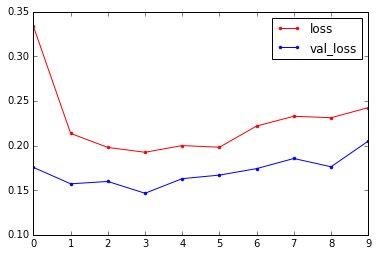

In [7]:
import  matplotlib.pyplot as plt
%matplotlib inline
keys = ["loss", "val_loss"]
colors = ["r","b"]
for key,cc in zip(keys, colors):
    plt.plot(mo.history[key], c=cc, label=key, marker=".")
#     plt.plot(mo.history[key], c="r")
plt.legend()

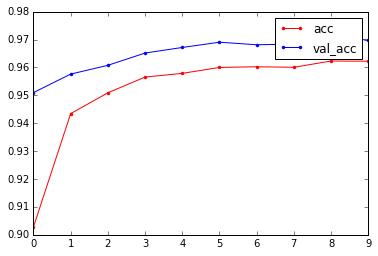

In [8]:
import  matplotlib.pyplot as plt
%matplotlib inline
keys = ["acc", "val_acc"]
colors = ["r","b"]
for key,cc in zip(keys, colors):
    plt.plot(mo.history[key], c=cc, label=key, marker=".")
#     plt.plot(mo.history[key], c="r")
plt.legend()